In [60]:
import geopandas as gpd
import xarray as xr
#import rasterio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import  os
import gzip
import shutil
import glob

In [59]:
# Set data directory
data_dir = "..\..\datasets"



In [ ]:
import rasterio

### Read precipitation file

In [73]:
# Read all files
chirps_gz_folder = os.path.join(data_dir, 'precipitation_chirps')
output_folder = os.path.join(data_dir, "precipitation_chirps\chirps_tif")

# Decompress all .gz files
for gz_file in os.listdir(chirps_gz_folder):
    if gz_file.endswith(".gz"):
        with gzip.open(os.path.join(chirps_gz_folder, gz_file), 'rb') as f_in:
            with open(os.path.join(data_dir, gz_file[:-3]), 'wb') as f_out:
                shutil.copyfileobj(f_in, f_out)
print("Decompression complete!")


### Read area of interest (aoi)

In [74]:
aoi = os.path.join(data_dir, 'aoi.gpkg')
gha = gpd.read_file(aoi)

gha.head(5)

## Precipitation pre-processing

### Calculate baseline average

In [77]:
''''
Study period: 2004 - 2024
'''
# Path to your .tif files
tif_files = sorted(glob.glob("path_to_tif_files/*.tif"))

# Extract dates from filenames (assuming filenames are formatted like chirps-v2.0.1981.07.tif)
dates = [pd.to_datetime(f.split('/')[-1].split('.')[2] + f.split('/')[-1].split('.')[3].replace('.tif', ''), format='%Y.%m') for f in tif_files]

# Load all TIFFs into an xarray DataArray
data_array = xr.concat(
    [xr.open_rasterio(tif).sel(band=1) for tif in tif_files],
    dim=pd.Index(dates, name="time")
)

# Set meaningful coordinates
data_array.name = "precipitation"  # Name the data
data_array.attrs["units"] = "mm"
print(data_array)


<xarray.DataArray 'precipitation' (time: 251, y: 1600, x: 1500)> Size: 2GB
array([[[-9.9990000e+03, -9.9990000e+03, -9.9990000e+03, ...,
          2.3331076e+01,  2.3563023e+01,  2.3801207e+01],
        [-9.9990000e+03, -9.9990000e+03, -9.9990000e+03, ...,
          2.2134623e+01,  2.2428806e+01,  2.3915134e+01],
        [-9.9990000e+03, -9.9990000e+03, -9.9990000e+03, ...,
          2.2133131e+01,  2.2486609e+01,  2.1635103e+01],
        ...,
        [-9.9990000e+03, -9.9990000e+03, -9.9990000e+03, ...,
         -9.9990000e+03, -9.9990000e+03, -9.9990000e+03],
        [-9.9990000e+03, -9.9990000e+03, -9.9990000e+03, ...,
         -9.9990000e+03, -9.9990000e+03, -9.9990000e+03],
        [-9.9990000e+03, -9.9990000e+03, -9.9990000e+03, ...,
         -9.9990000e+03, -9.9990000e+03, -9.9990000e+03]],

       [[-9.9990000e+03, -9.9990000e+03, -9.9990000e+03, ...,
          1.5318339e+01,  1.5258522e+01,  1.5699982e+01],
        [-9.9990000e+03, -9.9990000e+03, -9.9990000e+03, ...,
          1.4316711e+01,  1.4467157e+01,  1.5656946e+01],
        [-9.9990000e+03, -9.9990000e+03, -9.9990000e+03, ...,
          1.4863686e+01,  1.4665060e+01,  1.4182799e+01],
...
        [-9.9990000e+03, -9.9990000e+03, -9.9990000e+03, ...,
         -9.9990000e+03, -9.9990000e+03, -9.9990000e+03],
        [-9.9990000e+03, -9.9990000e+03, -9.9990000e+03, ...,
         -9.9990000e+03, -9.9990000e+03, -9.9990000e+03],
        [-9.9990000e+03, -9.9990000e+03, -9.9990000e+03, ...,
         -9.9990000e+03, -9.9990000e+03, -9.9990000e+03]],

       [[-9.9990000e+03, -9.9990000e+03, -9.9990000e+03, ...,
          1.3091490e+01,  1.2323617e+01,  1.1316311e+01],
        [-9.9990000e+03, -9.9990000e+03, -9.9990000e+03, ...,
          1.6383663e+01,  1.2714534e+01,  1.2353648e+01],
        [-9.9990000e+03, -9.9990000e+03, -9.9990000e+03, ...,
          1.5755609e+01,  1.5064243e+01,  1.2012130e+01],
        ...,
        [-9.9990000e+03, -9.9990000e+03, -9.9990000e+03, ...,
         -9.9990000e+03, -9.9990000e+03, -9.9990000e+03],
        [-9.9990000e+03, -9.9990000e+03, -9.9990000e+03, ...,
         -9.9990000e+03, -9.9990000e+03, -9.9990000e+03],
        [-9.9990000e+03, -9.9990000e+03, -9.9990000e+03, ...,
         -9.9990000e+03, -9.9990000e+03, -9.9990000e+03]]], dtype=float32)
Coordinates:
    band         int32 4B 1
  * x            (x) float64 12kB -19.97 -19.92 -19.87 ... 54.88 54.93 54.98
  * y            (y) float64 13kB 39.97 39.92 39.87 ... -39.88 -39.93 -39.98
    spatial_ref  int32 4B 0
  * time         (time) datetime64[ns] 2kB 1981-01-01 2004-01-01 ... 2024-10-01
Attributes:
    AREA_OR_POINT:             Area
    TIFFTAG_DATETIME:          2015:01:30 03:33:05
    TIFFTAG_DOCUMENTNAME:      /home/CHIRPS/monthly/v2.0/africa/chirps-v2.0.1...
    TIFFTAG_IMAGEDESCRIPTION:  IDL TIFF file
    TIFFTAG_RESOLUTIONUNIT:    2 (pixels/inch)
    TIFFTAG_SOFTWARE:          IDL 8.3, Exelis Visual Information Solutions, ...
    TIFFTAG_XRESOLUTION:       100
    TIFFTAG_YRESOLUTION:       100
    scale_factor:              1.0
    add_offset:                0.0
    units:                     mm

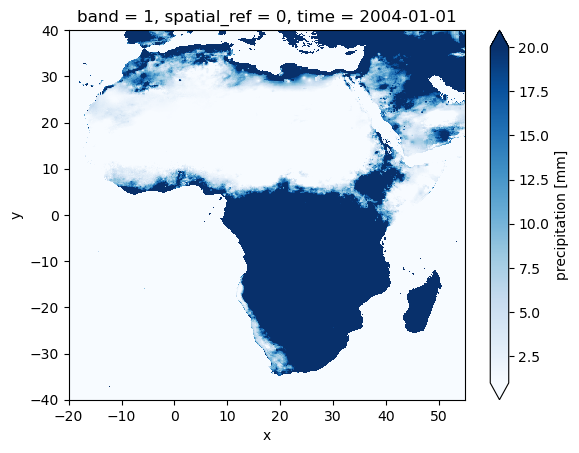